## Redes neuronales

Una familia de algoritmos conocidos como redes neuronales ha visto recientemente un renacimiento bajo el nombre de aprendizaje profundo. Si bien el aprendizaje profundo muestra una gran promesa en muchas aplicaciones del machine learning, los algoritmos de aprendizaje profundo a menudo se adaptan con mucho cuidado a un caso de uso específico. 

Utilizaremos perceptrones multicapa para clasificación y regresión, que pueden servir como punto de partida para métodos de aprendizaje profundo más especializados.  Los perceptrones multicapa (MLP) también se conocen como redes neuronales de retroalimentación o a veces solo redes neuronales.

### El modelo de redes neuronales

Los MLP se pueden ver como generalizaciones de modelos lineales que realizan múltiples etapas de procesamiento para tomar una decisión.

Recordar que la predicción por un regresor lineal es dado:

$$
\hat{y} = w[0]*x[0] + w[1]*x[1] + \dots + w[p]*x[p] +b
$$

En palabras $\hat{y}$ es una suma ponderada de las características de entrada `x[0]` a `x[p]`, ponderado por los coeficientes aprendidos `w[0]` a `w[p]`.

In [19]:
def dibuja_grafo_regresion_logistica():
    import graphviz
    grafo_rl = graphviz.Digraph(node_attr={'shape': 'circle', 'fixedsize': 'True'},
                                graph_attr={'rankdir': 'LR', 'splines': 'line'})
    entrada = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_0")
    salida = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_2")

    for i in range(4):
        entrada.node("x[%d]" % i, labelloc="c")
    entrada.body.append('label = "entrada"')
    entrada.body.append('color = "green"')

    grafo_rl.subgraph(entrada)

    salida.body.append('label = "salida"')
    salida.body.append('color = "red"')
    salida.node("y")

    grafo_rl.subgraph(salida)

    for i in range(4):
        grafo_rl.edge("x[%d]" % i, "y", label="w[%d]" % i)
    return grafo_rl

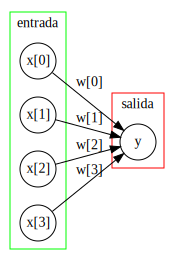

In [20]:
%matplotlib inline
display(dibuja_grafo_regresion_logistica())

Aquí, cada nodo de la izquierda representa una característica de entrada, las líneas de conexión representan los coeficientes aprendidos, y el nodo de la derecha representa la salida, que es una suma ponderada de las entradas.

En un MLP, este proceso de cálculo de sumas ponderadas se repite varias veces, primero computando unidades ocultas que representan un paso de procesamiento intermedio, que se combinan de nuevo usando sumas ponderadas para obtener el resultado final.


In [21]:
def dibuja_grafo_unica_capa_oculta():
    import graphviz
    grafo_nn = graphviz.Digraph(node_attr={'shape': 'circle', 'fixedsize': 'True'},
                                graph_attr={'rankdir': 'LR', 'splines': 'line'})

    entradas = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_0")
    capaOculta = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_1")
    salida = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_2")

    for i in range(4):
        entradas.node("x[%d]" % i)

    entradas.body.append('label = "entradas"')
    entradas.body.append('color = "green"')

    capaOculta.body.append('label = "capa oculta"')
    capaOculta.body.append('color = "red"')

    for i in range(3):
        capaOculta.node("h%d" % i, label="h[%d]" % i)

    salida.node("y")
    salida.body.append('label = "salida"')
    salida.body.append('color = "blue"')

    grafo_nn.subgraph(entradas)
    grafo_nn.subgraph(capaOculta)
    grafo_nn.subgraph(salida)

    for i in range(4):
        for j in range(3):
            grafo_nn.edge("x[%d]" % i, "h%d" % j)

    for i in range(3):
        grafo_nn.edge("h%d" % i, "y")
    return grafo_nn

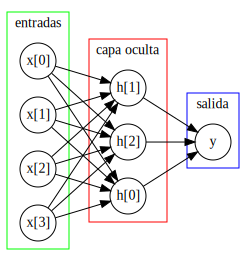

In [22]:
dibuja_grafo_unica_capa_oculta()

Este modelo tiene muchos más coeficientes (también llamados pesos) para aprender: hay uno entre cada entrada y cada unidad oculta (que conforman la capa oculta), y una entre cada unidad en la capa oculta y la salida.

Calcular una serie de sumas ponderadas matemáticamente es lo mismo que calcular una sola suma ponderada, por lo que para hacer que este modelo sea realmente más poderoso que un modelo lineal, necesitamos un truco adicional. Después de calcular una suma ponderada para cada unidad oculta, se aplica una función no lineal al resultado, generalmente `rectifying nonlinearity` (también conocida `rectified linear unit` relu) o `tangens hyperbolicus` (tanh). El resultado de esta función se usa en la suma ponderada que calcula la salida $\hat{y}$.  relu cancela valores por debajo de cero, mientras que tanh se satura a -1 para valores de entrada bajos y +1 para valores de entrada altos.

Text(0,0.5,'relu(x), tanh(x)')

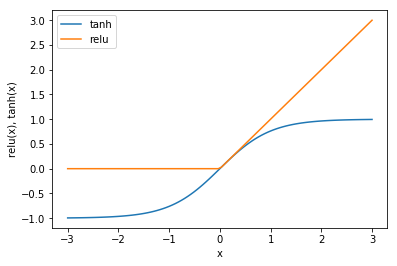

In [23]:
import matplotlib.pyplot as plt
import numpy as np

linea = np.linspace(-3, 3, 100)
plt.plot(linea, np.tanh(linea), label="tanh")
plt.plot(linea, np.maximum(linea, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Para la pequeña red neuronal representada, la fórmula completa para calcular $\hat{y}$ en el caso de regresión sería:

$$
h[0] = \tanh(w[0, 0]*x[0] + w[1, 0]*x[1] + w[2, 0]*x[2] + w[3, 0]*x[3])\\
h[1] = \tanh(w[0, 0]*x[0] + w[1, 0]*x[1] + w[2, 0]*x[2] + w[3, 0]*x[3])\\
h[2] = \tanh(w[0, 0]*x[0] + w[1, 0]*x[1] + w[2, 0]*x[2] + w[3, 0]*x[3])\\
$$


Por lo que: $\hat{y}= v[0]*h[0] + v[1]*h[1] + v[2]*h[2]$.

Aquí, `w` son los pesos entre la entrada `x` y la capa oculta `h`, `v` son los pesos entre la capa oculta `h` y la salida $\hat{y}$. Los pesos `v` y `w` se aprenden de los datos, `x` son las características de entrada, $\hat{y}$ es la salida calculada y `h` son cálculos intermedios. 

Un parámetro importante que debe establecer el usuario es la cantidad de nodos en la capa oculta. Esto puede ser tan pequeño como `10` para conjuntos de datos muy pequeños o simples y tan grande como `10.000` para datos muy complejos. También es posible agregar capas ocultas adicionales.

In [24]:
def dibuja_grafo_dos_capa_oculta():
    import graphviz
    grafo_nn = graphviz.Digraph(node_attr={'shape': 'circle', 'fixedsize': 'True'},
                                graph_attr={'rankdir': 'LR', 'splines': 'line'})

    entradas = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_0")
    capaOculta = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_1")
    capaOculta1 = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_2")
    
    salida = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_3")

    for i in range(4):
        entradas.node("x[%d]" % i)

    entradas.body.append('label = "entradas"')
    entradas.body.append('color = "green"')

    for i in range(3):
        capaOculta.node("h1[%d]" % i)
        
    for i in range(3):
        capaOculta1.node("h2[%d]" % i)
    
    capaOculta.body.append('label = "Capa oculta 1"')
    capaOculta.body.append('color = "orange"')
    
    capaOculta1.body.append('label = "Capa oculta 2"')
    capaOculta1.body.append('color = "yellow"')
        
        

    salida.node('y')
    salida.body.append('label = "salida"')
    salida.body.append('color = "blue"')

    grafo_nn.subgraph(entradas)
    grafo_nn.subgraph(capaOculta)
    grafo_nn.subgraph(capaOculta1)
    
    grafo_nn.subgraph(salida)

    for i in range(4):
        for j in range(3):
            grafo_nn.edge("x[%d]" % i, "h1[%d]" % j, label="")

    for i in range(3):
        for j in range(3):
            grafo_nn.edge("h1[%d]" % i, "h2[%d]" % j, label="")

    for i in range(3):
        grafo_nn.edge("h2[%d]" % i, "y", label="")

    return grafo_nn

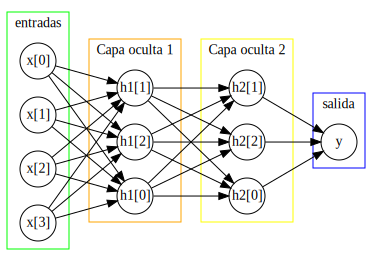

In [25]:
dibuja_grafo_dos_capa_oculta()

Tener grandes redes neuronales formadas por muchas de estas capas de computación es lo que inspiró el término "aprendizaje profundo".

### Ajustando redes neuronales

Utilicemos las funciones definidas anteriormente, para entender la aplicación de redes neuronales con scikit-learn.

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import  colorConverter

def dibuja_dispersion_discreta(x1, x2, y=None, marcadores=None, s=10, ax=None,
                     etiquetas=None, relleno=.2, alfa=1, c=None, anchobordemarcador=None):
    """Adaptacion de la funcion matplotlib.pyplot.scatter a dibujar clases o  clusters"""
    
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unico_y = np.unique(y)

    if marcadores is None:
        marcadores= ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(marcadores) == 1:
        marcadores = marcadores * len(unico_y)

    if etiquetas is None:
        etiquetas = unico_y

    # lineas en el sentido de matplotlib
    lineas = []

    actual_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unico_y, actual_cycler())):
        mascara = y == yy
        # if c is ninguno, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # bordes claros para marcadores oscuros
        if np.mean(colorConverter.to_rgb(color)) < .4:
            colorbordemarcador = "grey"
        else:
            colorbordemarcador = "black"

        lineas.append(ax.plot(x1[mascara], x2[mascara], marcadores[i], markersize=s,
                             label=etiquetas[i], alpha=alfa, c=color,
                             markeredgewidth=anchobordemarcador,
                             markeredgecolor=colorbordemarcador)[0])

    if relleno != 0:
        pad1 = x1.std() * relleno
        pad2 = x2.std() * relleno
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lineas

In [27]:
from matplotlib.colors import ListedColormap
cm2 = ListedColormap(['#0000aa', '#ff2020'])

def dibuja_separador_2d(clasificador, X, relleno=False, ax=None, eps=None, alfa=1,
                      cm=cm2, ancholinea=None, umbral=None,
                      estilolinea="solid"):

    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        valor_decision = clasificador.decision_function(X_grid)
        niveles = [0] if umbral is None else [umbral]
        niveles_f = [valor_decision.min()] + niveles + [valor_decision.max()]
    except AttributeError:
        # No funciones de decision
        valor_decision = clasificador.predict_proba(X_grid)[:, 1]
        niveles = [.5] if umbral is None else [umbral]
        niveles_f = [0] + niveles + [1]
    if relleno:
        ax.contourf(X1, X2, valor_decision.reshape(X1.shape),
                    levels=niveles_f, alpha=alfa, cmap=cm)
    else:
        ax.contour(X1, X2, valor_decision.reshape(X1.shape), levels=niveles,
                   colors="black", alpha=alfa, linewidths=ancholinea,
                   linestyles=estilolinea, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

Veamos el funcionamiento del MLP aplicando el `MLPClassifier` al conjunto de datos `two_ moon`.

Text(0,0.5,'Caracteristica 1')

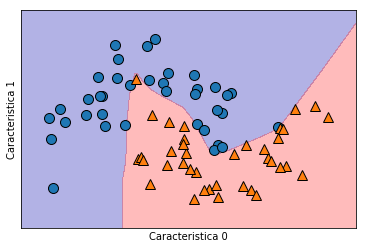

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, stratify=y,random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_entrenamiento, y_entrenamiento)
dibuja_separador_2d(mlp, X_entrenamiento, relleno=True, alfa=.3)

dibuja_dispersion_discreta(X_entrenamiento[:, 0], X_entrenamiento[:, 1], y_entrenamiento)
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

De forma predeterminada, MLP usa 100 nodos ocultos, lo cual es bastante para este pequeño conjunto de datos. Podemos reducir el número (lo que reduce la complejidad del modelo) y obtener un buen resultado.

Text(0,0.5,'Caracteristica 1')

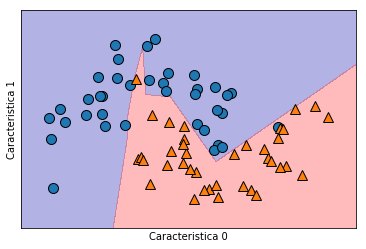

In [29]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_entrenamiento, y_entrenamiento)
dibuja_separador_2d(mlp, X_entrenamiento, relleno=True, alfa=.3)

dibuja_dispersion_discreta(X_entrenamiento[:, 0], X_entrenamiento[:, 1], y_entrenamiento)
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

Con solo 10 unidades ocultas, la frontera de decisión parece un poco más irregular. La no linealidad predeterminada es relu. Con una sola capa oculta, esto significa que la función de decisión estará formada por 10 segmentos de línea recta. Si queremos una frontera  de decisión más uniforme, podríamos agregar más unidades ocultas, agregando una segunda capa oculta.

Text(0,0.5,'Caracteristica 1')

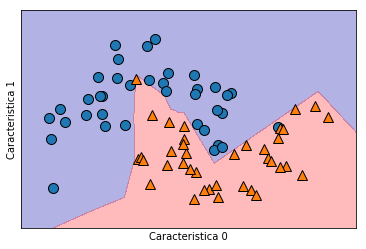

In [30]:
# Usando dos capas ocultas, con 10 unidades cada una

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_entrenamiento, y_entrenamiento)
dibuja_separador_2d(mlp, X_entrenamiento, relleno=True, alfa=.3)

dibuja_dispersion_discreta(X_entrenamiento[:, 0], X_entrenamiento[:, 1], y_entrenamiento)
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

Hagamos lo mismo utilizando la nonlinealidad de `tanh`.

Text(0,0.5,'Caracteristica 1')

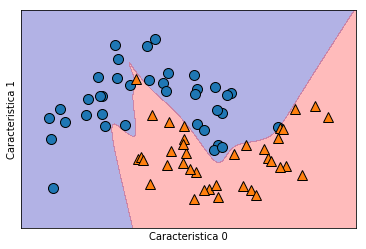

In [32]:
# Usando dos capas ocultas, con 10 unidades cada una

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_entrenamiento, y_entrenamiento)

dibuja_separador_2d(mlp, X_entrenamiento, relleno=True, alfa=.3)
dibuja_dispersion_discreta(X_entrenamiento[:, 0], X_entrenamiento[:, 1], y_entrenamiento)
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

Finalmente, también podemos controlar la complejidad de una red neuronal utilizando una penalización `l2` para reducir los pesos hacia cero, como se hizo  en la regresión ridge y los clasificadores lineales. El parámetro para esto en MLPClassifier es `alpha` (como en los modelos de regresión lineal) y se establece en un valor muy bajo (poca regularización) de forma predeterminada. El siguiente gráfico muestra el efecto de diferentes valores de `alpha` en el conjunto de datos `two_moons`, usando dos capas ocultas de `10` o `100` unidades cada una.


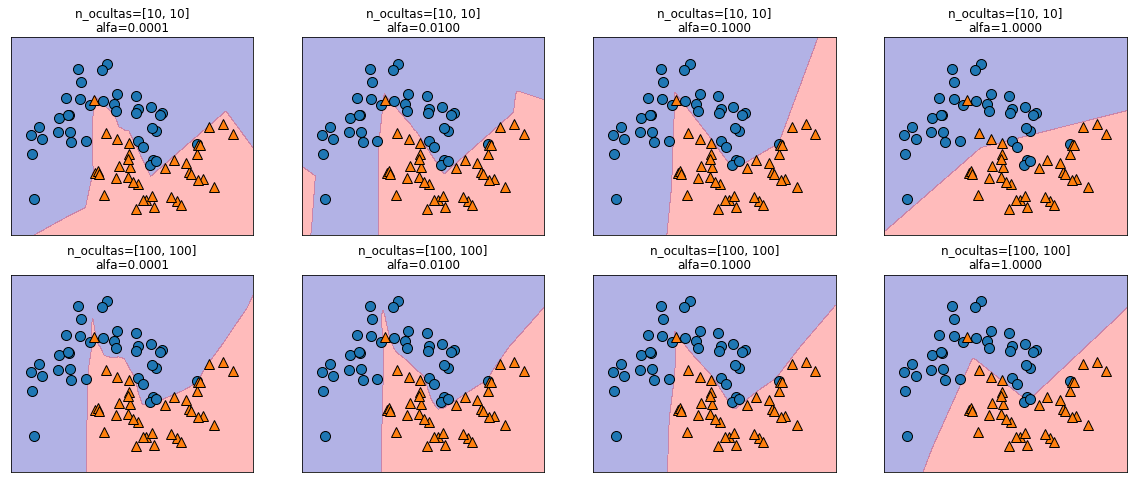

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_nodos_ocultos in zip(axes, [10, 100]):
    for ax, alfa in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_nodos_ocultos, n_nodos_ocultos],alpha=alfa)
        mlp.fit(X_entrenamiento, y_entrenamiento)
        dibuja_separador_2d(mlp, X_entrenamiento, relleno=True, alfa=.3, ax=ax)
        dibuja_dispersion_discreta(X_entrenamiento[:, 0], X_entrenamiento[:, 1], y_entrenamiento, ax=ax)
        ax.set_title("n_ocultas=[{}, {}]\nalfa={:.4f}".format( n_nodos_ocultos, n_nodos_ocultos, alfa))

Una propiedad importante de las redes neuronales es que sus ponderaciones se establecen aleatoriamente antes de comenzar el aprendizaje  y esta inicialización aleatoria afecta al modelo que se aprende. Eso significa que incluso cuando se usan exactamente los mismos parámetros, podemos obtener modelos muy diferentes cuando se usan semillas diferentes al azar. Si las redes son grandes y su complejidad se elige correctamente, esto no debería afectar la precisión también
mucho, pero vale la pena tenerlo en cuenta (especialmente para redes más pequeñas).

La siguiente figura muestra gráficos de varios modelos, todos aprendidos con la misma configuración de los parámetros:

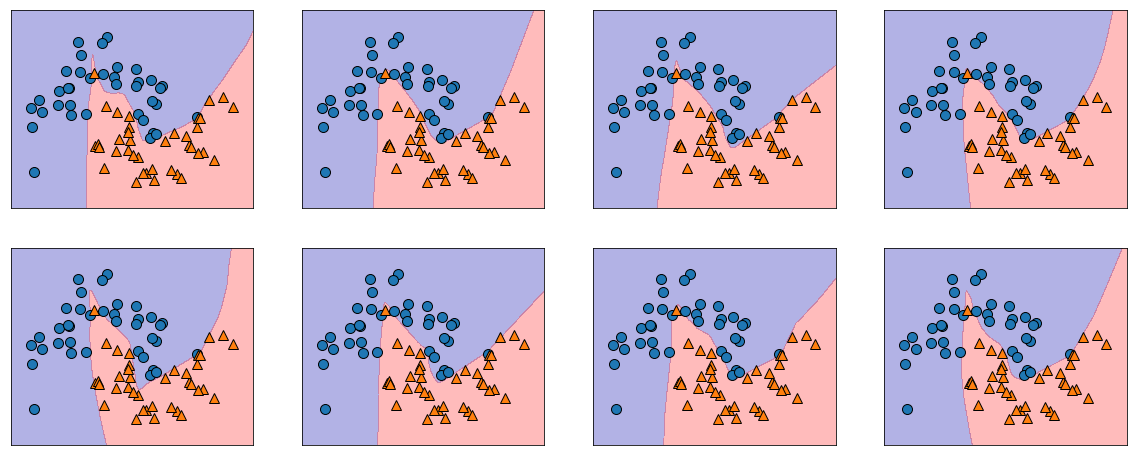

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_entrenamiento, y_entrenamiento)
    
    dibuja_separador_2d(mlp, X_entrenamiento, relleno=True, alfa=.3, ax=ax)
    dibuja_dispersion_discreta(X_entrenamiento[:, 0], X_entrenamiento[:, 1], y_entrenamiento, ax=ax)

Para obtener una mejor comprensión de las redes neuronales en datos del mundo real, apliquemos MLPClassifier al conjunto de datos `Breast Cancer`. Comenzamos con los parámetros predeterminados:

In [42]:
from sklearn.datasets import load_breast_cancer
#np.set_printoptions(suppress=True)
cancer = load_breast_cancer()

print("Datos de cancer por caracteristica maxima:\n{}".format(cancer.data.max(axis=0)))

Datos de cancer por caracteristica maxima:
[  28.11      39.28     188.5     2501.         0.1634     0.3454
    0.4268     0.2012     0.304      0.09744    2.873      4.885
   21.98     542.2        0.03113    0.1354     0.396      0.05279
    0.07895    0.02984   36.04      49.54     251.2     4254.
    0.2226     1.058      1.252      0.291      0.6638     0.2075 ]


In [48]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split( cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_entrenamiento, y_entrenamiento)
print("Precision del conjunto de entrenamiento: {:.3f}".format(mlp.score(X_entrenamiento, y_entrenamiento)))
print("Precision del conjunto de pruebas: {:.3f}".format(mlp.score(X_prueba, y_prueba)))

Precision del conjunto de entrenamiento: 0.906
Precision del conjunto de pruebas: 0.881


La precisión del MLP es bastante buena, pero no tan buena como los otros modelos. Como en el ejemplo de SVC anterior, es probable que esto se deba al escalado de los datos. Las redes neuronales también esperan que todas las características de entrada varíen de manera similar, e idealmente tengan una media de 0 y una varianza de 1. Debemos cambiar la escala de nuestros datos para que cumplan con estos requisitos.

Nuevamente, hacemos esto a mano aquí, ya que se puede utilizar  `StandardScaler` para hacer esto automáticamente.


In [49]:
# Calculamos la media por caracteristica en el conjunto de entrenamiento
media_conjunto_entrenamiento = X_entrenamiento.mean(axis=0)

# calculamos la desviacion estandar de cada caracteristica en el conjunto de entrenamiento
std_conjunto_entrenamiento = X_entrenamiento.std(axis=0)

# sustraemos la media y escalamos la inversa de la desviacion estandar
# despues mean=0, std =1
X_entrenamiento_escalado = (X_entrenamiento -media_conjunto_entrenamiento)/std_conjunto_entrenamiento

# usamos la misma transformacion sobre el conjunto de prueba
X_prueba_escalado = (X_prueba - media_conjunto_entrenamiento)/std_conjunto_entrenamiento

mlp = MLPClassifier(random_state=0)
mlp.fit(X_entrenamiento_escalado, y_entrenamiento)

print("Precision del conjunto de entrenamiento: {:.3f}".format(mlp.score(X_entrenamiento_escalado, y_entrenamiento)))
print("Precision del conjunto de pruebas: {:.3f}".format(mlp.score(X_prueba_escalado, y_prueba)))

Precision del conjunto de entrenamiento: 0.991
Precision del conjunto de pruebas: 0.965


/home/c-laraavila/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Los resultados son mucho mejores después de escalar  y ya son bastante competitivos. Sin embargo, recibimos una advertencia del modelo que nos dice que se ha alcanzado el número máximo de iteraciones. Esto es parte del algoritmo de `Adam` para aprender el modelo y nos dice que debemos aumentar el número de iteraciones:

In [50]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_entrenamiento_escalado, y_entrenamiento)

print("Precision del conjunto de entrenamiento: {:.3f}".format(mlp.score(X_entrenamiento_escalado, y_entrenamiento)))
print("Precision del conjunto de pruebas: {:.3f}".format(mlp.score(X_prueba_escalado, y_prueba)))

Precision del conjunto de entrenamiento: 0.993
Precision del conjunto de pruebas: 0.972


Aumentar el número de iteraciones solo aumentó el rendimiento del conjunto de entrenamiento, no el rendimiento de generalización. Aún así, el modelo está funcionando bastante bien. Como hay una brecha entre el rendimiento de los conjuntos de  entrenamiento y de  prueba, podemos tratar de disminuir la complejidad del modelo para obtener un mejor rendimiento de generalización. Aquí, optamos por aumentar el parámetro `alpha` (de 0.0001 a 1) para agregar una regularización más fuerte de los pesos:

In [51]:
mlp = MLPClassifier(max_iter=1000,alpha=1, random_state=0)
mlp.fit(X_entrenamiento_escalado, y_entrenamiento)

print("Precision del conjunto de entrenamiento: {:.3f}".format(mlp.score(X_entrenamiento_escalado, y_entrenamiento)))
print("Precision del conjunto de pruebas: {:.3f}".format(mlp.score(X_prueba_escalado, y_prueba)))

Precision del conjunto de entrenamiento: 0.988
Precision del conjunto de pruebas: 0.972


Si bien es posible analizar lo que ha aprendido una red neuronal, esto suele ser mucho más complicado que analizar un modelo lineal o un modelo basado en árbol. Una forma de introspección de lo aprendido es observar los pesos en el modelo. Puede ver un ejemplo de esto en la [galería de ejemplos de scikit-learn](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html).

Para el conjunto de datos `Breast Cancer`, esto puede ser un poco difícil de entender. El siguiente gráfico  muestra los pesos que se aprendieron conectando la entrada a la primera capa oculta. Las filas en este gráfico corresponden a las 30 características de entrada, mientras que las columnas corresponden a las 100 unidades ocultas. Los colores claros representan valores positivos grandes, mientras que los colores oscuros representan valores negativos:


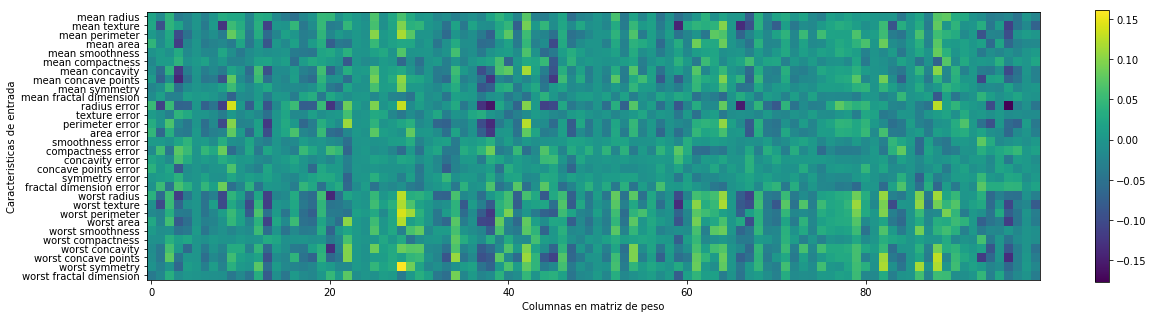

In [52]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columnas en matriz de peso")
plt.ylabel("Caracteristicas de entrada")
plt.colorbar()

Una posible inferencia que podemos hacer es que las características que tienen pesos muy pequeños para todas las unidades ocultas son "menos importantes" para el modelo. Podemos ver que `mean smoothness` y `mean compactness`, además de las características que se encuentran entre `smoothness error` y `fractal dimension error`, tienen pesos relativamente bajos en comparación con otras características. Esto podría significar que estas son características menos importantes o posiblemente que no las representemos de una manera que la red neuronal podría usar.

También podríamos visualizar los pesos que conectan la capa oculta con la capa de salida, pero esos son aún más difíciles de interpretar.

### Fortalezas, debilidades y paramétros

Las redes neuronales, a menudo tardan mucho tiempo en entrenarse. También requieren un preprocesamiento cuidadoso de los datos. De forma similar a las SVM, funcionan mejor con datos "homogéneos", donde todas las características tienen significados similares. Para datos que tienen tipos muy diferentes de características, los modelos basados en árboles pueden funcionar mejor.
Ajustar los parámetros de la red neuronal es también un arte en sí mismo. En los experimentos, apenas arañamos la superficie de las posibles formas de ajustar los modelos de redes neuronales y cómo entrenarlos.

### Estimando la complejidad en una red neuronal

Los parámetros más importantes son el número de capas y el número de unidades ocultas por capa. Deberías comenzar con una o dos capas ocultas y posiblemente expandirse desde allí. La cantidad de nodos por capa oculta a menudo es similar a la cantidad de características de entrada, pero rara vez es más alta que en el nivel bajo o medio.

Una medida útil cuando se piensa en la complejidad del modelo de una red neuronal es el número de ponderaciones o coeficientes que se aprenden. Si se tiene un conjunto de datos de clasificación binaria con `100` características y tiene `100` unidades ocultas, entonces hay `100 * 100 = 10.000` pesos entre la entrada y la primera capa oculta. 


También hay `100 * 1 = 100` pesos entre la capa oculta y la capa de salida, para un total de alrededor de `10,100` pesos. Si agrega una segunda capa oculta con `100` unidades ocultas, habrá otros `100 * 100 = 10.000` pesos desde la primera capa oculta hasta la segunda capa oculta, lo que arrojará un total de `20.100` pesos. Si, en su lugar, utiliza una capa con `1.000` unidades ocultas, está aprendiendo `100 * 1,000 = 100.000` pesos desde la entrada a la capa oculta y `1,000 * 1` pesos desde la capa oculta a la capa de salida, para un total de `101.000`. 

Si agrega una segunda capa oculta, se agrega `1000 * 1.000 = 1.000,000` de pesos, para un enorme total de `1.101,000`, `50` veces más grande que el modelo con dos capas ocultas de tamaño `100`.


Una forma común de ajustar los parámetros en una red neuronal es crear primero una red que sea lo suficientemente grande como para sobreajustar, asegurándose de que la tarea pueda ser realmente aprendida por la red Luego, una vez que sepa que se pueden aprender los datos de entrenamiento, se pueda reducir la red o aumentar `alpha` para agregar regularización, lo que mejorará el rendimiento de generalización.

Cuando se  comience a trabajar con MLP, se recomienda utilizar `adam` que funciona bien en la mayoría de las situaciones, pero es bastante sensible a la escala de los datos (por lo que es importante escalar siempre los datos a media `0` y varianza `1`) y `lbfgs`  que es bastante robusto pero que puede llevar mucho tiempo en modelos  grandes o en conjuntos de datos más grandes.
